## Challenge 1

I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:



Use this command to create a dataframe with the data provided in the table.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm

In [4]:
age_values = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
tardies_values = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]

In [5]:
student_data = pd.DataFrame({'Age': age_values, 'Tardies': tardies_values})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.


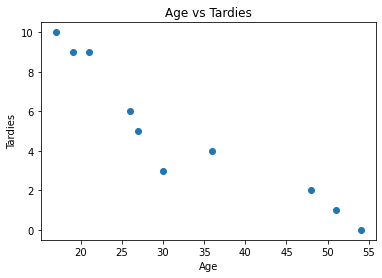

In [6]:
plt.scatter(student_data['Age'], student_data['Tardies'])
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Age vs Tardies')
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?


In [8]:
## The relationship between the age and the tardies column seems to be negative, meaning that the younger
## the student, he or she tends to have a greater number of tardies, whereas the older the student is, he or she
## tends to have less number of tardies. This trend could reveal us approximately how number of tardies does
## a student could have based on their age.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.



In [9]:
print("Covariance matrix of x:\n", np.cov(student_data['Age'], student_data['Tardies']))

Covariance matrix of x:
 [[187.65555556 -45.56666667]
 [-45.56666667  12.54444444]]


In [10]:
print(student_data.corr())

              Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000


In [11]:
pearsonr(student_data['Age'], student_data['Tardies'])

(-0.9391626886887121, 5.5666538345534396e-05)

In [12]:
## These results seems to complement my previous analysis, since the correlation between age and tardies
## is negative (-0.939163), so one when variable goes up (age) the other one goes down (tardies) and vice versa.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.



In [13]:
X = np.array(student_data['Age']).reshape(-1, 1)
y = student_data['Tardies']

reg = LinearRegression().fit(X, y)

print(reg.coef_)

print(reg.intercept_)


[-0.24282077]
12.888803363135771


In [19]:
## We'll be trying to predict the number of Tardies based on the student's age. 
# Linear regression seems to be the one who can do the work for us.

In [20]:
def regmodel(x):
    y = (reg.coef_*x)+reg.intercept_  # y = mx + b
    return y 

In [21]:
regmodel(3)

array([12.16034105])

Plot your regression model on your scatter plot.



In [16]:
new_x = X 
regmodel(new_x)

array([[ 8.76085026],
       [ 0.50494405],
       [ 6.33264255],
       [ 7.78956717],
       [ 4.14725561],
       [ 1.23340636],
       [ 8.27520872],
       [ 6.57546332],
       [-0.22351827],
       [ 5.60418024]])

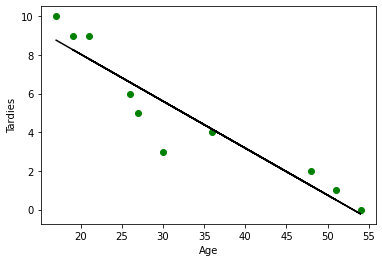

In [17]:
plt.scatter(X, y, color='g') 

plt.plot(new_x, regmodel(new_x),color='k') 
plt.xlabel('Age')
plt.ylabel('Tardies')

plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.



In [22]:
## According to this last graph, we can be confident that there is a negative correlation between
## age and tardies in this case, with some caveats, like maybe our regression model seems to have 
## a quicker pace at predicting new data, whereas the original data points seem to follow a curvy trend,
## meaning that event though the relations between the variables is clearly negative,
## they don't follow a rigid and constant trend as the model suggests.

## Challenge 2

For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables.



In [23]:
vehicles = pd.read_csv('./vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable.

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [24]:
new_vehicles = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 
                         'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]

new_vehicles.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [25]:
## Most positively correlated column with CO2 Emission Grams/Mile --> Fuel Barrels/Year (0.986189)

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.



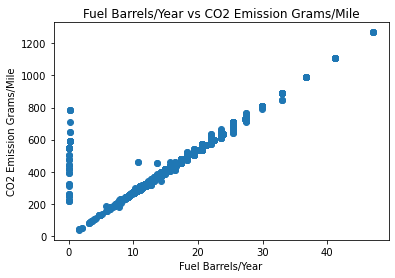

In [26]:
plt.scatter(new_vehicles['Fuel Barrels/Year'], new_vehicles['CO2 Emission Grams/Mile'])

plt.xlabel('Fuel Barrels/Year')
plt.ylabel('CO2 Emission Grams/Mile')
plt.title('Fuel Barrels/Year vs CO2 Emission Grams/Mile')

plt.show()

In [28]:
## The trend here is clearly resembling a linear regression model, with some data on the left being kind of outliers.

In [27]:
X_v = np.array(new_vehicles['Fuel Barrels/Year']).reshape(-1, 1)
y_v = new_vehicles['CO2 Emission Grams/Mile']

reg = LinearRegression().fit(X_v, y_v)

print(reg.coef_)

print(reg.intercept_)

[26.2836254]
12.486520830732445


In [29]:
new_x_v = X_v
regmodel(new_x_v)

array([[522.09509538],
       [678.8977337 ],
       [553.94563128],
       ...,
       [253.13501437],
       [253.13501437],
       [260.01068561]])

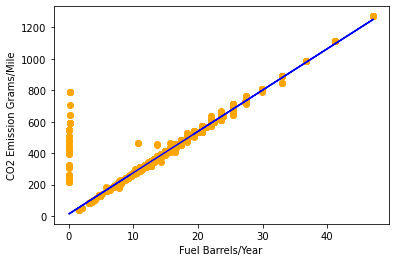

In [30]:
plt.scatter(X_v, y_v, color='orange') 

plt.plot(new_x_v, regmodel(new_x_v),color='b') 
plt.xlabel('Fuel Barrels/Year')
plt.ylabel('CO2 Emission Grams/Mile')

plt.show()

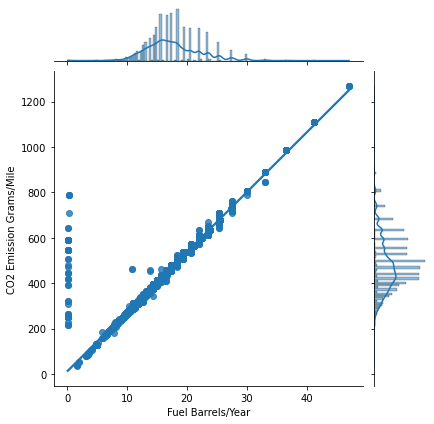

In [31]:
sns.jointplot(x='Fuel Barrels/Year', y='CO2 Emission Grams/Mile', data=new_vehicles, kind='reg')

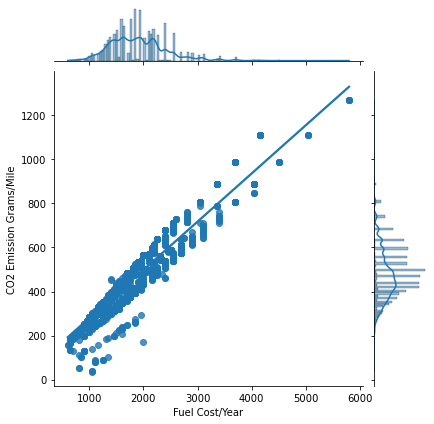

In [32]:
sns.jointplot(x='Fuel Cost/Year', y='CO2 Emission Grams/Mile', data=new_vehicles, kind='reg')

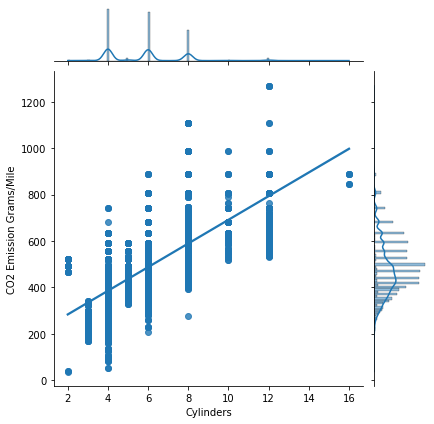

In [33]:
sns.jointplot(x='Cylinders', y='CO2 Emission Grams/Mile', data=new_vehicles, kind='reg')

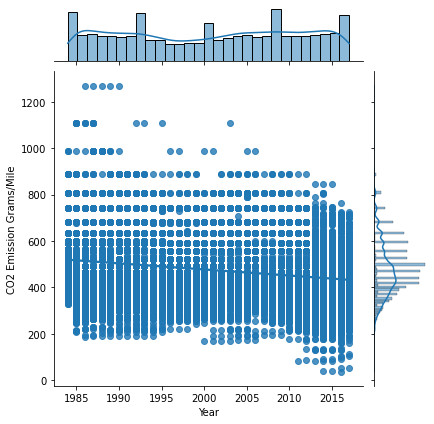

In [34]:
sns.jointplot(x='Year', y='CO2 Emission Grams/Mile', data=new_vehicles, kind='reg')

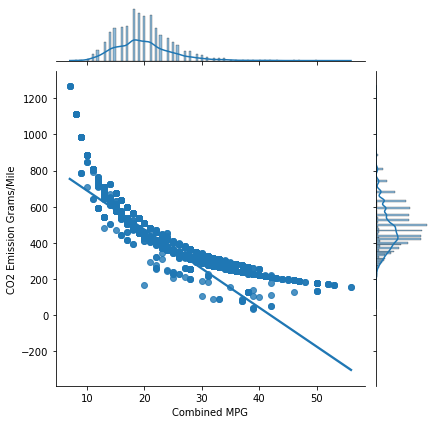

In [35]:
sns.jointplot(x='Combined MPG', y='CO2 Emission Grams/Mile', data=new_vehicles, kind='reg')

Print your regression summary, and interpret the results. What are the most important variables in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.



In [36]:
#define response variable
y = new_vehicles['CO2 Emission Grams/Mile']

#define predictor variables
x = new_vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 
                         'Combined MPG', 'Fuel Cost/Year']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                             21:35:15   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
## r-squared: range from 0 to 1, the closer to 1, the better the model fits the data

## According to this summary, it seems that the model did a pretty good job since R-squared
## is equal to 0.981, meaning that it fits the data pretty accurately.

## Another variables we should take into consideration is the coef column, which tells us
## that the closer to zero this number is, the better the variable that accompanies it is as a predictor.
## Hence, the Fuel/Cost year column with a coef of 0.0323 is the best predictor for CO2 Emission Grams/Mile
## when all these variables are combined.

## Bonus Challenge: Error Analysis


I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended.



We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. First, build a dataframe with the data.



In [42]:
parties = pd.DataFrame({'X': [1, 3, 4, 6, 8, 9, 11, 14], 'Y': [1, 2, 2, 4, 5, 7, 8, 13]})
parties

,X,Y
0,1,1
1,3,2
2,4,2
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.



In [43]:
X = np.array(parties['X']).reshape(-1, 1)
y = parties['Y']

reg = LinearRegression().fit(X, y)

print(reg.coef_)

print(reg.intercept_)


[0.89393939]
-1.007575757575756


In [44]:
new_x_p = X
regmodel(new_x_p)

array([[-0.11363636],
       [ 1.67424242],
       [ 2.56818182],
       [ 4.35606061],
       [ 6.14393939],
       [ 7.03787879],
       [ 8.82575758],
       [11.50757576]])

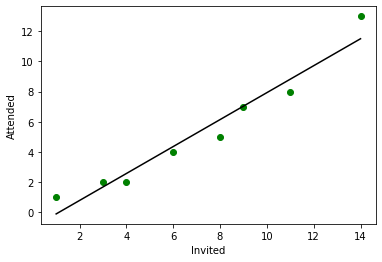

In [45]:
plt.scatter(X, y, color='g') 

plt.plot(new_x_p, regmodel(new_x_p),color='k') 
plt.xlabel('Invited')
plt.ylabel('Attended')

plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.



In [46]:
## The relationship between the invited number of people and the attended ones is clearly positive, 
## which means that we don't have to be suspicious anymore, because the more people we invite to the party, 
## the more people attend.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model.



In [47]:
parties.drop([7], inplace=True)

In [48]:
X = np.array(parties['X']).reshape(-1, 1)
y = parties['Y']

reg = LinearRegression().fit(X, y)

print(reg.coef_)

print(reg.intercept_)

[0.73684211]
-0.27819548872180544


In [49]:
new_x_p = X
regmodel(new_x_p)

array([[0.45864662],
       [1.93233083],
       [2.66917293],
       [4.14285714],
       [5.61654135],
       [6.35338346],
       [7.82706767]])

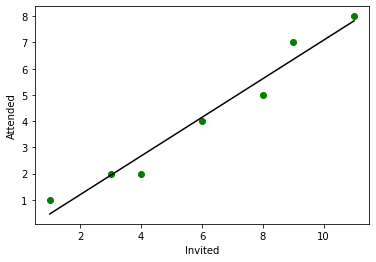

In [50]:
plt.scatter(X, y, color='g') 

plt.plot(new_x_p, regmodel(new_x_p),color='k') 
plt.xlabel('Invited')
plt.ylabel('Attended')

plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?



In [51]:
## This second graph seems to be fitting more accurately our data, since we removed successfully
## the outlier of 14 people invited and 13 attended which was a distant point in our data
## compared to the rest ones.